In [1]:
import shapely.geometry as sg
import numpy as np
import random


In [12]:
box_min,box_max = 0,10

box1 = sg.box(0,0,10,10)
# box1

In [14]:
# first set of rand pts
side1 = random.sample(range(box_min+1,box_max),5)

In [16]:
side1

[9, 6, 2, 4, 3]

In [62]:
a = []
for i in range(100):
    a.append(random.randint(1,10))
    
    

In [80]:
side1[::-1].sort()


In [81]:
side1

array([10.9, 10.8, 10.4,  9.9,  9. ,  8.9,  8.8,  8.3,  6.7,  5. ,  4.9,
        4.9,  4.6,  4.1,  2.9,  2.3,  1.1,  0.6,  0.3,  0.1])

In [82]:
side1 = np.random.randint(box_min+1,box_max*10,(20))/10
side1.sort()
side2 = np.random.randint(box_min+1,box_max*10,(20))/10
side2.sort()
side3 = np.random.randint(box_min+1,box_max*10,(20))/10
side3[::-1].sort()
side4 = np.random.randint(box_min+1,box_max*10,(20))/10
side4[::-1].sort()

In [83]:
# make points
side1_pts = [sg.Point(box_min,x) for x in side1]
side1_mpts = sg.MultiPoint(side1_pts)
side2_pts = [sg.Point(x,box_max) for x in side2]
side2_mpts = sg.MultiPoint(side2_pts)
side3_pts = [sg.Point(x,box_min) for x in side3]
side3_mpts = sg.MultiPoint(side3_pts)
side4_pts = [sg.Point(box_max,x) for x in side4]
side4_mpts = sg.MultiPoint(side4_pts)

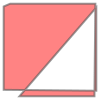

In [84]:
sg.Polygon(side1_pts + side2_pts + side3_pts + side4_pts)


In [73]:
side1_pts.union(side2_pts).union(side3_pts).union(side4_pts)

AttributeError: 'list' object has no attribute 'union'

In [54]:
def get_angles(vec_1,vec_2):
    dot = np.dot(vec_1, vec_2)
    det = np.cross(vec_1,vec_2)
    angle_rad = np.arctan2(det,dot)
    return np.degrees(angle_rad)


def simplify_by_interior_angle(poly_in, deg_tol = 5):
    """
    attempt to get persistent coordinate points that remain after
    simplify, convex hul, etc
    
    """
    
    ext_poly_coords = poly_in.exterior.coords[:]
    vector_rep = np.diff(ext_poly_coords,axis = 0)
    for i in range(0,len(vector_rep) -1 ):
        angles_list.append(np.abs(get_angles(vector_rep[i],vector_rep[i+1])))
        
    thresh_vals_by_deg = np.where(np.array(angles_list) > deg_tol)
#   gotta be a better way to do this. sandwich betweens first and last pts
    new_idx = [0] + (thresh_vals_by_deg[0] + 1).tolist() + [0]
    new_vertices = [ext_poly_coords[idx] for idx in new_idx]
#     add geom type check l8r, for now only interested in poly
    return sg.Polygon(new_vertices)

        